<a href="https://colab.research.google.com/github/saurbhjaiswl/hello-world/blob/master/DataMiningAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q.1.

An airline operates a set of flights daily with some fixed capacity. Each of these
flights are called a flight leg. A passenger might use one or more of these flight legs
to travel from him origin to reach the final destination, called the itinerary. The
demand and cost of each itinerary is known. The problem faced by the airline is
to determine the portion of demand of each itinerary to accept so as to maximise
the total revenue. This problem can be formulated as a network flow optimisation
problem.

Let the set of flight legs be L and the itineraries be I. Let the capacity of a flight
leg l ∈ ***L*** be cl . Also, let the fare paid by a passenger for an itinerary i ∈ I be
fi and the demand for the itinerary is di . The decision problem from the airline
perspective is to determine the portion of demand xi that should be carried for
itinerary i without violating the capacity constraints and also maximise the total
revenue generated. This linear programming problem is as given below in which
the function I(l) maps a flight leg l ∈ ***L*** to all the itineraries using it.

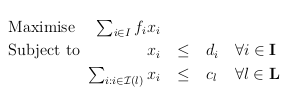

Write a Python program using the linprog function in the SciPy library to solve
this problem for the accompanying data set. Identify the flight leg that is capacity
constrained.

In the flight leg capacity file (cap.d) you will find entries like 21 318 where 21 is
the flight leg ID and 318 is the capacity of the flight leg. The itinerary flight leg
mapping file (it_legs.d) has entries like 1 0 35, where 1 indicate the itinerary ID,
0 the first flight leg of the itinerary and 35 the second flight leg of the itinerary.
In case of single flight leg itineraries the second flight leg will be marked with -1.
The itinerary demand and fares by fare class (first line in these files) are provided
in it_fares.d and it_demand.d files respectively. The itinerary ID + fare class
constitute the members of the itinerary set **I**.

\

\

In [13]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/Temp/DataMining/Assignment1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/gdrive/
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-2981afeb116c>", line 4, in <module>
    get_ipython().run_line_magic('cd', 'gdrive/MyDrive/Temp/DataMining/Assignment1')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2314, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 334, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.

OSError: ignored

Importing the necessary libraries.

In [10]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Temp/DataMining/Assignment1')

ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog

In [ ]:
cap = pd.read_csv('cap.d',names=['cap'],delimiter=' ')
cap

,cap
1,101
2,104
3,51
4,75
5,62
...,...
76,12
77,0
78,16
79,18


In [ ]:
it_demand = pd.read_csv('it_demand.D',index_col=0, delim_whitespace=True)
it_demand

,C,D,Z,H,B,F,L,G,Y,K,T
0,50.81,1.46,9.50,32.74,4.39,16.62,17.58,18.56,1.94,0.00,1.71
1,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.43,0.00,1.28,0.43,0.00,0.00,0.00,0.43,2.56
3,0.53,0.00,0.00,0.00,0.00,1.06,0.00,0.00,0.00,0.00,1.07
4,0.42,0.00,0.00,0.84,0.00,0.00,1.27,0.00,0.42,0.00,2.12
...,...,...,...,...,...,...,...,...,...,...,...
512,2.19,0.31,0.00,0.31,1.87,0.00,0.00,0.00,0.00,0.00,0.31
513,0.74,0.00,0.00,0.00,0.37,0.00,1.50,0.00,0.00,0.00,0.00
514,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00
515,0.00,0.00,0.00,0.00,0.00,0.31,0.31,0.00,0.00,0.00,0.00


In [ ]:
it_fares = pd.read_csv('it_fares.d',index_col=0, delim_whitespace=True)
it_fares

,K,B,M,V,Y,L,H
0,386,197,386,158,685,685,297
1,416,316,738,235,1203,416,474
2,557,293,688,234,1016,557,441
3,458,245,574,195,848,458,368
4,425,323,754,258,1229,425,0
...,...,...,...,...,...,...,...
445,0,157,0,96,0,0,0
446,0,284,0,0,0,0,0
447,234,0,0,0,0,0,0
448,0,271,0,0,0,0,0


Total number of Flight legs =  80 \
Total number of Iteneraries = 450 \
Fare Classes = {K,	B,	Y,	L,	H}

In [ ]:
cap = pd.read_csv('cap.d',names=['cap'],delimiter=' ').reset_index()[['cap']]
cap

,cap
0,101
1,104
2,51
3,75
4,62
...,...
75,12
76,0
77,16
78,18


In [ ]:
it_demand=(pd.read_csv('it_demand.D',index_col=0, delim_whitespace=True)[['K','B','Y','L','H']].iloc[0:450]*100).astype(int)
it_demand

,K,B,Y,L,H
0,0,438,194,1757,3274
1,0,0,0,0,0
2,43,128,0,0,0
3,0,0,0,0,0
4,0,0,42,127,84
...,...,...,...,...,...
445,0,0,23,229,437
446,0,0,0,0,0
447,0,34,0,0,0
448,0,0,0,96,0


In [ ]:
it_fares=pd.read_csv('it_fares.d',index_col=0, delim_whitespace=True)[['K','B','Y','L','H']]
it_fares

,K,B,Y,L,H
0,386,197,685,685,297
1,416,316,1203,416,474
2,557,293,1016,557,441
3,458,245,848,458,368
4,425,323,1229,425,0
...,...,...,...,...,...
445,0,157,0,0,0
446,0,284,0,0,0
447,234,0,0,0,0
448,0,271,0,0,0


In [ ]:
c= np.array(it_fares).flatten()*-1
c

array([-386, -197, -685, ...,    0,    0,    0])

In [ ]:
it_legs = pd.read_csv('it_legs.d',names=['it_id','leg1_id', 'leg2_id'],delimiter='\t')[['leg1_id','leg2_id']]
it_legs

,leg1_id,leg2_id
0,0,-1
1,0,35
2,0,37
3,0,44
4,0,47
...,...,...
445,5,53
446,31,53
447,15,65
448,13,55


In [ ]:
b1= np.array(it_demand).flatten()
print(b1,b1.shape)

[  0 438 194 ...  35   0   0] (2250,)


In [ ]:
b2=np.zeros(450*5).astype(int)
print(b2,b2.shape)

[0 0 0 ... 0 0 0] (2250,)


In [ ]:
b3=np.array(cap).flatten()
print(b3,b3.shape)

[101 104  51  75  62  71  12  39  49  34  46  71  56  24  27  54  72  88
  80 154 105 124 141  88  46  20  21  46  64  85  71  64 104  44  56  52
  80  55  24  56  12  19  54  39  39  34  71  21  71  32  34  72  88  69
  81 124 276  83 124  93  64  66  20  51  21  41  64  73  40  88  80  79
  79  67  28  12   0  16  18   0] (80,)


In [ ]:
A1=np.identity(450*5)
print(A1,A1.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]] (2250, 2250)


In [ ]:
A2=-1*A1
print(A2,A2.shape)

[[-1. -0. -0. ... -0. -0. -0.]
 [-0. -1. -0. ... -0. -0. -0.]
 [-0. -0. -1. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -1. -0. -0.]
 [-0. -0. -0. ... -0. -1. -0.]
 [-0. -0. -0. ... -0. -0. -1.]] (2250, 2250)


In [ ]:
A3=np.zeros((80,2250))
print(A3,A3.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (80, 2250)


In [ ]:
it_legs_np= np.array(it_legs)
it_legs_np

In [ ]:
for it in range(it_legs_np.shape[0]):
  for leg in it_legs_np[it]:
    if leg==-1:
      pass
    else:
      A3[leg,it*5:(it+1)*5]=[1]*5

In [ ]:
A3.shape

(80, 2250)

In [ ]:
A=np.concatenate((A1,A2,A3))
b= np.concatenate((b1,b2,b3))
print("A:\n",A,"\nA.shape: ",A.shape)
print("\n\nb:\n",b,"\nb.shape: ",b.shape)
print("\n\nc:\n",c,"\nc.shape: ",c.shape)

A:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
A.shape:  (4580, 2250)


b:
 [  0 438 194 ...  16  18   0] 
b.shape:  (4580,)


c:
 [-386 -197 -685 ...    0    0    0] 
c.shape:  (2250,)


In [ ]:
res = linprog(c, A_ub=A, b_ub=b)

In [ ]:
print('Optimal Total Fare:', round(res.fun*-1, ndigits=2),
      '\nx values:        ', res.x,
      '\nStatus:          ', res.message,
      '\nNumber of iterations performed:', res.nit)

Optimal Total Fare: 1737576.99 
x values:         [0.00000000e+00 4.00488978e-09 2.70573102e+01 ... 2.24896418e-09
 0.00000000e+00 0.00000000e+00] 
Status:           Optimization terminated successfully. 
Number of iterations performed: 14


In [10]:
x

NameError: ignored